In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [7]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [9]:
df.sentiment.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 2, inplace=True)

In [11]:
df.head(20)

review  sentiment
0   One of the other reviewers has mentioned that ...          1
1   A wonderful little production. <br /><br />The...          1
2   I thought this was a wonderful way to spend ti...          1
3   Basically there's a family where a little boy ...          2
4   Petter Mattei's "Love in the Time of Money" is...          1
5   Probably my all-time favorite movie, a story o...          1
6   I sure would like to see a resurrection of a u...          1
7   This show was an amazing, fresh & innovative i...          2
8   Encouraged by the positive comments about this...          2
9   If you like original gut wrenching laughter yo...          1
10  Phil the Alien is one of those quirky films wh...          2
11  I saw this movie when I was about 12 when it c...          2
12  So im not a big fan of Boll's work but then ag...          2
13  The cast played Shakespeare.<br /><br />Shakes...          2
14  This a fantastic movie of three prisoners who ...          1
15  Kind of drawn in by the erotic scenes, only to...          2
16  Some films just simply should not be remade. T...          1
17  This movie made it into one of my top 10 most ...          2
18  I remember this film,it was the first film i h...          1
19  An awful film! It must have been up against so...          2

In [13]:
df['review'] = df['review'].str.lower() \
    .str.replace('<br />', '', regex=False) \
    .str.replace(r'https\S+|www\S+|http\S+', '', regex=True) \
    .str.replace(r'\@\w+|\#', '', regex=True) \
    .str.replace(r'[^\w\s]', '', regex=True)

In [14]:
for i in range(6):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget p

In [17]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /home/husna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
def stopword_removing(text):
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [21]:
df.review = df['review'].apply(stopword_removing)

In [29]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("Sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
one reviewers mentioned watching 1 oz episode youll hooked right exactly happened methe first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awayi would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mann

In [31]:
duplicated_count = df.duplicated().sum()
print("Tekrar eden kayıtlar: ", duplicated_count)

Tekrar eden kayıtlar:  0


In [33]:
df = df.drop_duplicates('review')

In [35]:
df_stemming=df.copy()

In [37]:
def stemming(text):
    # PorterStemmer nesnesini oluşturma
    stemmer = PorterStemmer()
    words = text.split()  # Yorumu kelimelere ayırma
    stemmed_words = [stemmer.stem(word) for word in words]  # Her kelimeyi stemleme
    return ' '.join(stemmed_words)

In [43]:
df_stemming['review'] = df_stemming['review'].apply(lambda x: stemming(x))

In [46]:
for i in range(5):
    print("Review: ", [i])
    print(df_stemming['review'].iloc[i], "\n")
    print("Sentiment: ", df_stemming['sentiment'].iloc[i], "\n\n")

Review:  [0]
one review mention watch 1 oz episod youll hook right exactli happen meth first thing struck oz brutal unflinch scene violenc set right word go trust show faint heart timid show pull punch regard drug sex violenc hardcor classic use wordit call oz nicknam given oswald maximum secur state penitentari focu mainli emerald citi experi section prison cell glass front face inward privaci high agenda em citi home manyaryan muslim gangsta latino christian italian irish moreso scuffl death stare dodgi deal shadi agreement never far awayi would say main appeal show due fact goe show wouldnt dare forget pretti pictur paint mainstream audienc forget charm forget romanceoz doesnt mess around first episod ever saw struck nasti surreal couldnt say readi watch develop tast oz got accustom high level graphic violenc violenc injust crook guard wholl sold nickel inmat wholl kill order get away well manner middl class inmat turn prison bitch due lack street skill prison experi watch oz may be

In [41]:
pos_reviews =  df[df.sentiment == 1]
pos_reviews.head() 

review  sentiment
0  one reviewers mentioned watching 1 oz episode ...          1
1  wonderful little production filming technique ...          1
2  thought wonderful way spend time hot summer we...          1
4  petter matteis love time money visually stunni...          1
5  probably alltime favorite movie story selfless...          1

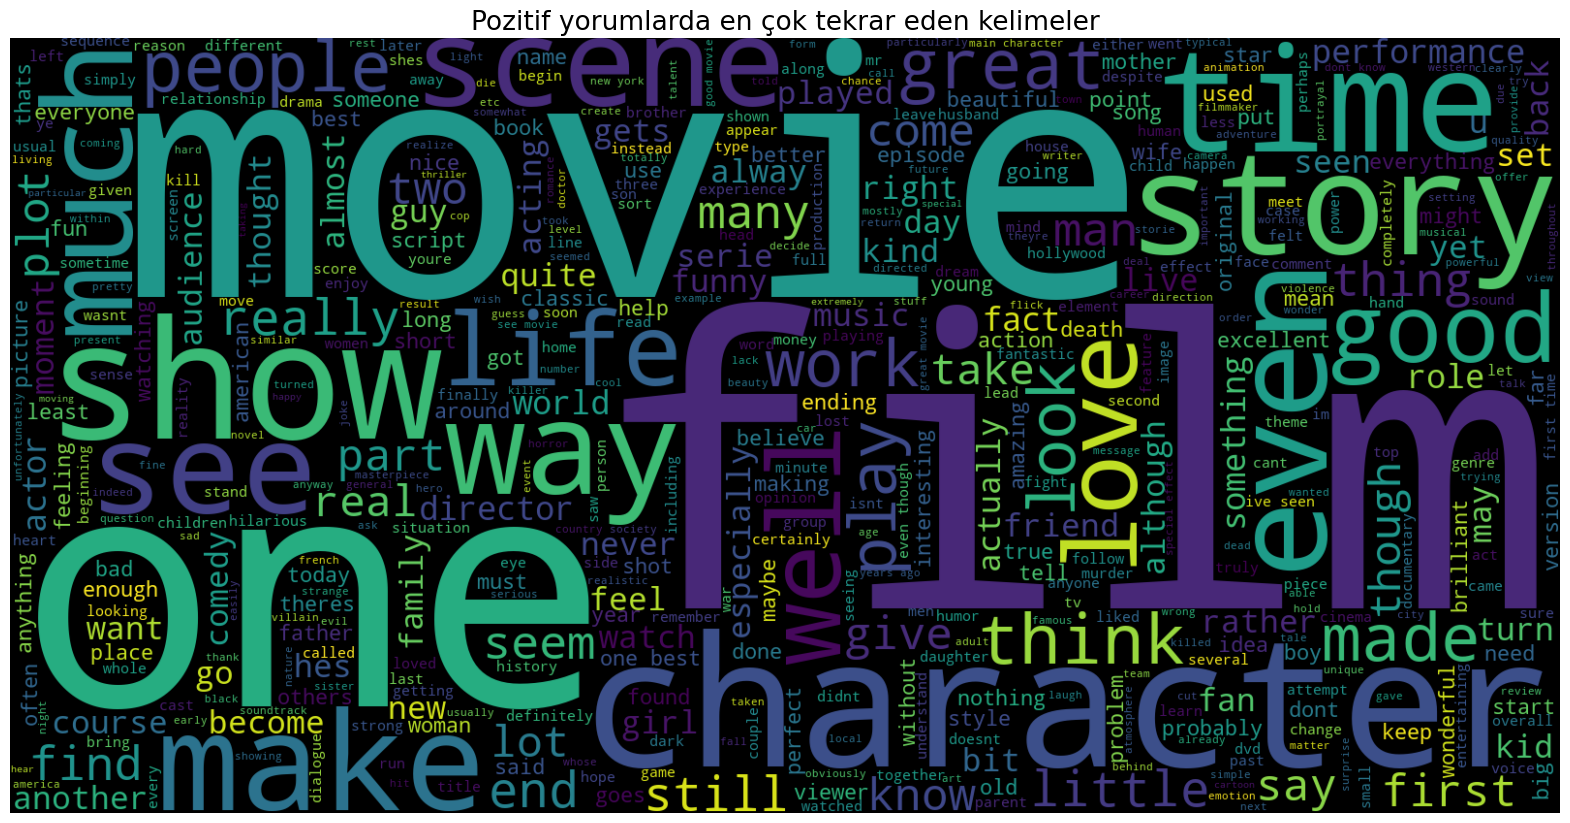

In [42]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Pozitif yorumlarda en çok tekrar eden kelimeler', fontsize = 19)
plt.show()

In [48]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [49]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

word  count
0   film  39285
1  movie  35830
2    one  25621
3   like  16998
4   good  14281

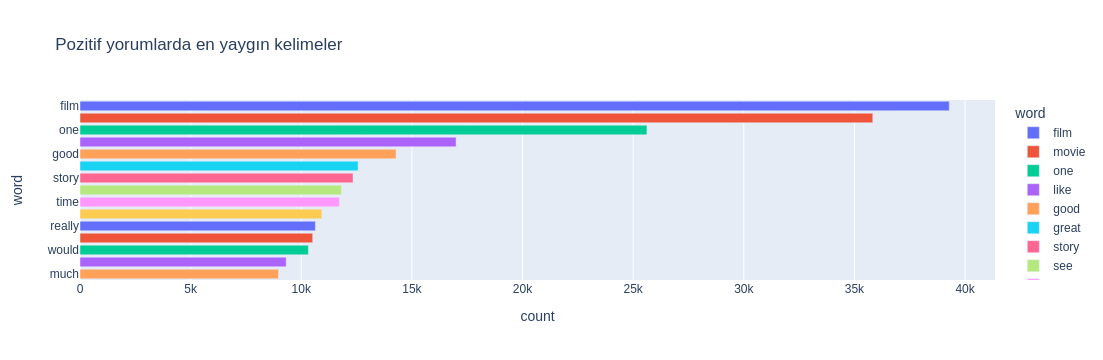

In [50]:
px.bar(pos_words, x='count', y='word', title='Pozitif yorumlarda en yaygın kelimeler', color = 'word')

In [56]:
neg_reviews =  df[df.sentiment == 2]
neg_reviews.head()

review  sentiment
3   basically theres family little boy jake thinks...          2
7   show amazing fresh innovative idea 70s first a...          2
8   encouraged positive comments film looking forw...          2
10  phil alien one quirky films humour based aroun...          2
11  saw movie 12 came recall scariest scene big bi...          2

In [58]:
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [60]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

word  count
0  movie  47001
1   film  34651
2    one  24361
3   like  21508
4   even  14759

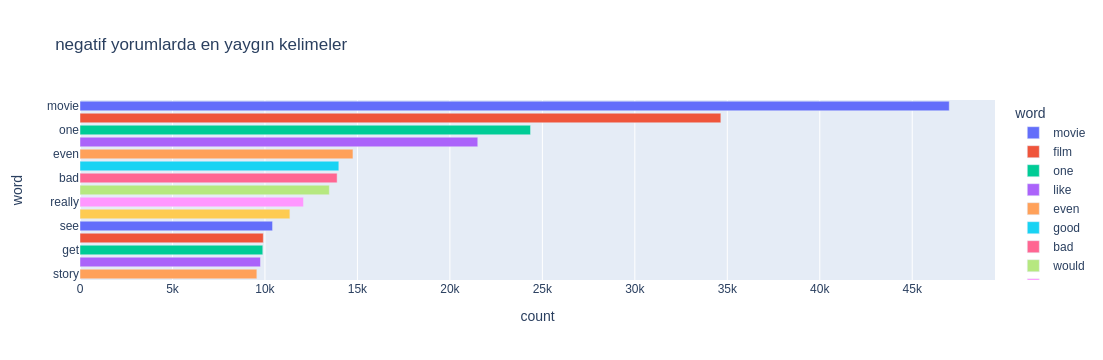

In [63]:
px.bar(neg_words, x='count', y='word', title='negatif yorumlarda en yaygın kelimeler', color = 'word')

In [62]:

X = df['review']
Y = df['sentiment']

In [64]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])


In [66]:

Xstem = df_stemming['review']
Ystem= df_stemming['sentiment']

In [68]:
vect_stem = TfidfVectorizer()
Xstem = vect_stem.fit_transform(df_stemming['review'])


In [69]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)#stemming oladan

In [72]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221700)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221700)
Size of y_test:  (14874,)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [76]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.00%


In [78]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6785  728]
 [ 908 6453]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [80]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))


Test accuracy: 86.43%


In [82]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6437 1076]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [84]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.23%


In [86]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6767  746]
 [ 856 6505]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [88]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6767  746]
 [ 856 6505]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [90]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit=True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.1s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.1s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.1s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.2s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.3s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.3s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.2s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.2s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.2s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.896 total time=   0.4s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [93]:
svc = LinearSVC(C = 1, loss='hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.40%


In [94]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))


[[6788  725]
 [ 851 6510]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [92]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [94]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 221700)
Size of y_train:  (2000,)
Size of x_test:  (500, 221700)
Size of y_test:  (500,)


In [96]:

x_train = x_train.toarray()
x_test = x_test.toarray()

In [99]:
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 643.6 kB/s eta 0:00:00m eta -:--:--
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 258.7 kB/s eta 0:00:00m eta 0:00:010:00:19
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 413.6 kB/s eta 0:00:001m399.6 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 389.9 kB/s eta 0:00:001m371.3 kB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 595.1 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 307.9 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 918.7 kB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 324.9 kB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 666.8 kB/s eta 0:00:000:00:010:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 664.5 kB/s eta 0:00:001m724.0 kB/s eta 0:00:01
   ━━━

In [98]:
from keras.models import Sequential
from keras.layers import Dense

2024-06-07 12:05:16.142926: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 12:05:16.211596: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-07 12:05:16.586292: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-07 12:05:17.464704: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [102]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [104]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [106]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

2024-06-07 12:07:36.455353: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1773600000 exceeds 10% of free system memory.


Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.4798 - loss: -0.2248
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5093 - loss: -5.5737
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5165 - loss: -17.3730
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4924 - loss: -40.5057
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5009 - loss: -74.8426
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5088 - loss: -123.5982
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5148 - loss: -189.2944
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4903 - loss: -285.8297
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.4893 - loss: -406.3607
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4970 - loss: -541.5795
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.5103 - loss: -696.9379
Epoch 12/15
200

In [108]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │     3,547,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,094,724 (27.06 MB)

 Trainable params: 3,547,361 (13.53 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,547,363 (13.53 MB)

In [112]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5126 - loss: -1934.1667
Test loss: -2054.337158203125
Test accuracy: 0.48399999737739563


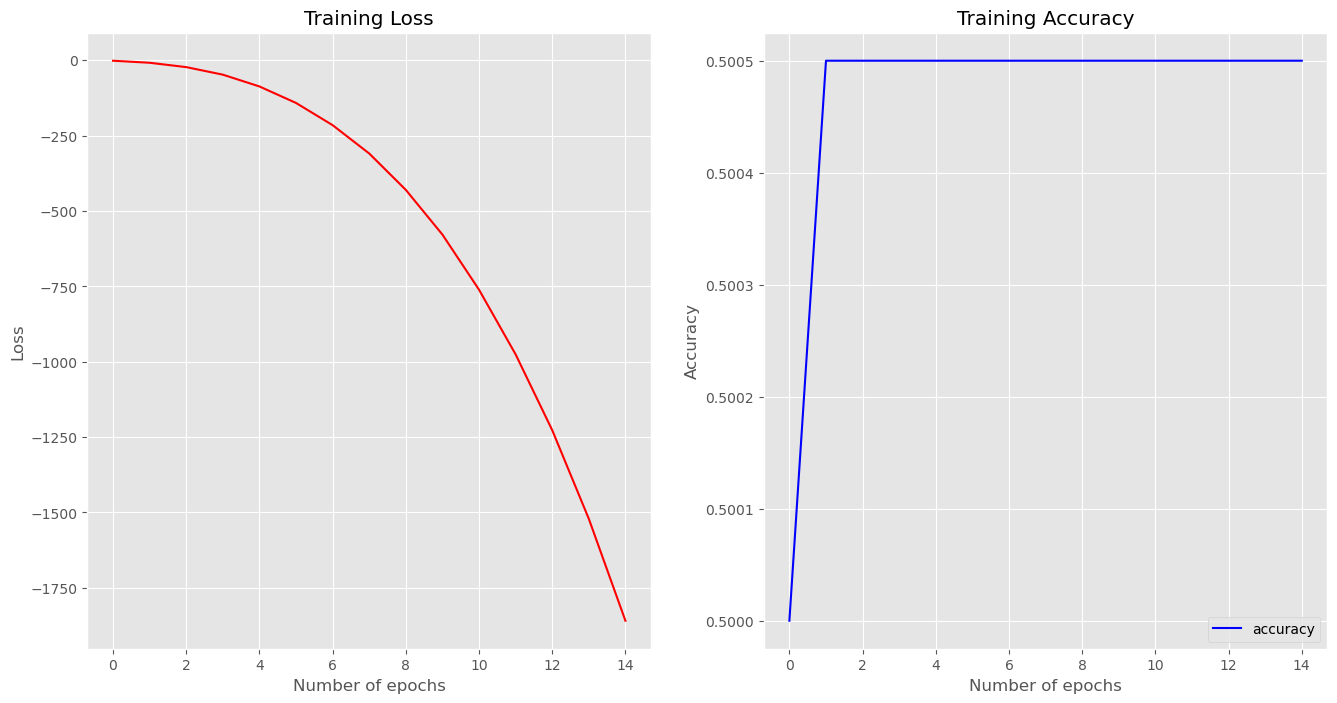

In [114]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], color='r', label='loss')
plt.title('Training Loss')
plt.xlabel("Number of epochs")
plt.ylabel("Loss")
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], color='b', label='accuracy')
plt.title('Training Accuracy')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [118]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [120]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:

history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.4990 - loss: -0.1481
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.4716 - loss: -8.2897
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5164 - loss: -38.3967
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.5018 - loss: -117.2364
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.5194 - loss: -245.7156
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.4966 - loss: -472.0131
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.4994 - loss: -772.8395
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5035 - loss: -1136.5630
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.4996 - loss: -1635.0149
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5110 - loss: -2182.0186
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.5083 - loss: -2842.2068
Epoch 1

In [130]:
x_train, x_test, y_train, y_test = train_test_split(Xstem, Ystem, test_size=0.3, random_state=42)#stemming ile

In [134]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 179599)
Size of y_train:  (34704,)
Size of x_test:  (14874, 179599)
Size of y_test:  (14874,)


In [136]:

x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

In [138]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (2000, 179599)
Size of y_train:  (2000,)
Size of x_test:  (500, 179599)
Size of y_test:  (500,)


In [140]:
x_train = x_train.toarray()
x_test = x_test.toarray()


In [142]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [144]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [146]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4869 - loss: 0.0765
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5058 - loss: -4.0968
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.5141 - loss: -14.3228
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.4956 - loss: -35.8395
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5014 - loss: -69.2025
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4921 - loss: -122.1698
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5021 - loss: -193.8677
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.5041 - loss: -290.8085
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.5053 - loss: -410.5324
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4819 - loss: -587.5827
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.5143 - loss: -726.8338
Epoch 12/15
20

In [148]:

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5126 - loss: -2119.0820
Test loss: -2252.753173828125
Test accuracy: 0.48399999737739563


In [150]:
model = Sequential()
model.add(Dense(units=16, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [152]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [154]:
history = model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.5010 - loss: 0.0774
Epoch 2/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5003 - loss: -5.5956
Epoch 3/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5231 - loss: -26.0661
Epoch 4/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.5041 - loss: -83.1029
Epoch 5/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4919 - loss: -189.0689
Epoch 6/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - accuracy: 0.5074 - loss: -336.1112
Epoch 7/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - accuracy: 0.4978 - loss: -570.8910
Epoch 8/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - accuracy: 0.5056 - loss: -850.5729
Epoch 9/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 37ms/step - accuracy: 0.4928 - loss: -1244.5405
Epoch 10/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.5066 - loss: -1667.2062
Epoch 11/15
200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - accuracy: 0.5095 - loss: -2132.6802
Epoch 12/15

In [156]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5126 - loss: -5577.7075
Test loss: -5930.30908203125
Test accuracy: 0.48399999737739563
